# Importation des données

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme()

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, to_tree, cut_tree
from scipy.spatial.distance import pdist, squareform

from sklearn.metrics import confusion_matrix
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data/data.csv.gz", compression = 'gzip')

# Kmeans

## Kmeans sur toutes les données

In [ ]:
data_copy = data.drop(columns=['Unnamed: 0']).copy()

kmeans= KMeans(n_clusters=5,
               n_init = 5,
               init='random',
               random_state = 10,
               verbose=True).fit(data_copy)

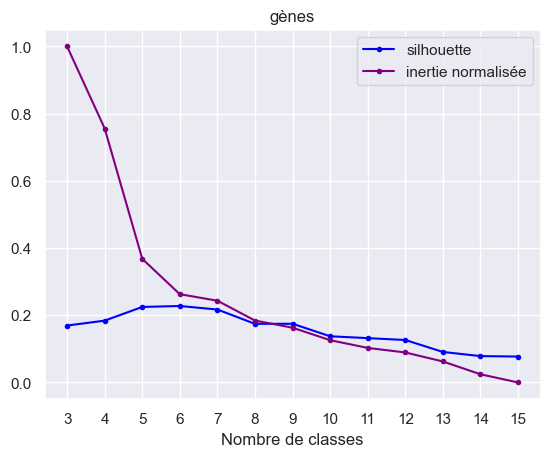

In [14]:
# List of number of clusters
range_n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
inertia = []
silhouette = []
# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:

    # Perform k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(data_copy)
    inertia.append(kmeans.inertia_)

    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(data_copy, y_pred)
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(data_copy, y_pred)
    silhouette.append(s_mean)

plt.plot(range_n_clusters,silhouette,".-", color = 'blue', label="silhouette")
plt.plot(range_n_clusters,(inertia-np.min(inertia))/(np.max(inertia)-np.min(inertia)),".-", color = 'purple', label="inertie normalisée")
plt.xticks(range_n_clusters)
plt.xlabel("Nombre de classes")
plt.title("gènes")
plt.legend()

## Kmeans sur les données filtrées + centrées réduites

In [15]:
import pandas as pd

# Calculer la variance des colonnes
variances = data.drop(columns=['Unnamed: 0']).var(axis=0)

# Filtrer les gènes avec un seuil (ex: 0.01)
df_filtré = data.drop(columns=['Unnamed: 0']).loc[:, variances > 3]

df_filtré.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 3531 entries, gene_18 to gene_20529
dtypes: float64(3531)
memory usage: 21.6 MB


In [16]:
df = pd.DataFrame(df_filtré)  # conversion en df

# Appliquer le StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convertir en DataFrame si besoin
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

# Vérification : moyenne proche de 0 et écart-type proche de 1
print("Moyennes après scaling:", df_scaled.mean().mean())  # Devrait être proche de 0
print("Écart-types après scaling:", df_scaled.std().mean())  # Devrait être proche de 1


Moyennes après scaling: -3.7948854334468506e-18
Écart-types après scaling: 1.0006248048094746


In [ ]:
data_scaled_copy = df_scaled.copy()

kmeans= KMeans(n_clusters=5,
               n_init = 5,
               init='random',
               random_state = 10,
               verbose=True).fit(data_copy)

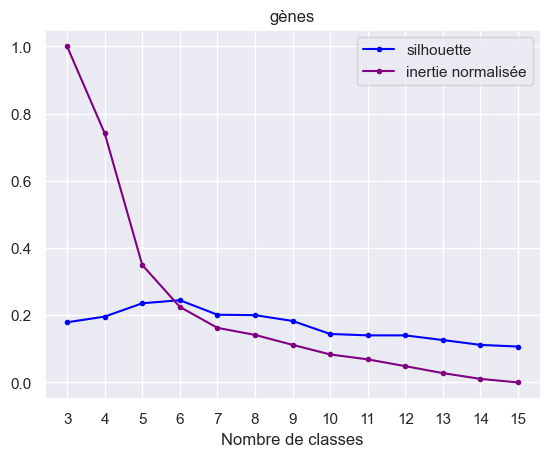

In [18]:
# List of number of clusters
range_n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
inertia = []
silhouette = []
# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:

    # Perform k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(data_scaled_copy)
    inertia.append(kmeans.inertia_)

    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(data_scaled_copy, y_pred)
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(data_scaled_copy, y_pred)
    silhouette.append(s_mean)

plt.plot(range_n_clusters,silhouette,".-", color = 'blue', label="silhouette")
plt.plot(range_n_clusters,(inertia-np.min(inertia))/(np.max(inertia)-np.min(inertia)),".-", color = 'purple', label="inertie normalisée")
plt.xticks(range_n_clusters)
plt.xlabel("Nombre de classes")
plt.title("gènes")
plt.legend()

# Kmeans sur les données filtrées + centrées réduites + ACP

## Comparer les classes formées avec les vraies classes

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import pandas as pd
import numpy as np

# Copier les données normalisées
data_scaled_copy = df_scaled.copy()

# Importation des données labels
labels = pd.read_csv('data/labels.csv', sep=',')

# Appliquer K-Means
kmeans = KMeans(n_clusters=5, n_init=5, init='random', random_state=10, verbose=True)
kmeans.fit(data_scaled_copy)

# Récupérer les labels prédits par K-Means
predicted_labels = kmeans.labels_

# Comparer avec les vrais labels
true_labels = labels['Class'].astype('category').cat.codes.values  # Convertir les types de cancer en codes numériques

# Calcul des métriques d'évaluation
ari = adjusted_rand_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

# S'assurer que toutes les classes sont bien représentées dans le tableau croisé
unique_classes = labels['Class'].unique()
contingency_table = pd.crosstab(pd.Series(labels['Class'], name='True Labels').astype(pd.CategoricalDtype(categories=unique_classes)),
                                pd.Series(predicted_labels, name='Predicted Clusters'),
                                dropna=False)
print(contingency_table)



Initialization complete
Iteration 0, inertia 3815491.6476199566.
Iteration 1, inertia 1961540.1494519454.
Iteration 2, inertia 1929374.8950484497.
Iteration 3, inertia 1928760.624693959.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3805566.7489349595.
Iteration 1, inertia 1951253.8483856665.
Iteration 2, inertia 1837866.0729253246.
Iteration 3, inertia 1836277.3157138966.
Iteration 4, inertia 1835933.1073975377.
Iteration 5, inertia 1835892.9780007517.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4441703.840641797.
Iteration 1, inertia 2088585.149343316.
Iteration 2, inertia 1913628.848778918.
Iteration 3, inertia 1878504.2445588526.
Iteration 4, inertia 1877100.5042378954.
Iteration 5, inertia 1867752.8421496795.
Iteration 6, inertia 1817076.5666349668.
Iteration 7, inertia 1680743.897802873.
Iteration 8, inertia 1666332.5967351317.
Iteration 9, inertia 1666261.248454159.
Iteration 10, inertia 

In [25]:
print("Distribution des vrais labels dans chaque cluster:")
for cluster in range(5):  
    print(f"Cluster {cluster}:")
    print(labels['Class'][predicted_labels == cluster].value_counts(), "\n")



Distribution des vrais labels dans chaque cluster:
Cluster 0:
Class
PRAD    136
Name: count, dtype: int64 

Cluster 1:
Class
KIRC    145
Name: count, dtype: int64 

Cluster 2:
Class
BRCA    253
Name: count, dtype: int64 

Cluster 3:
Class
LUAD    141
BRCA     47
KIRC      1
COAD      1
Name: count, dtype: int64 

Cluster 4:
Class
COAD    77
Name: count, dtype: int64 



Initialization complete
Iteration 0, inertia 3815491.6476199566.
Iteration 1, inertia 1961540.1494519454.
Iteration 2, inertia 1929374.8950484497.
Iteration 3, inertia 1928760.624693959.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3805566.7489349595.
Iteration 1, inertia 1951253.8483856665.
Iteration 2, inertia 1837866.0729253246.
Iteration 3, inertia 1836277.3157138966.
Iteration 4, inertia 1835933.1073975377.
Iteration 5, inertia 1835892.9780007517.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4441703.840641797.
Iteration 1, inertia 2088585.149343316.
Iteration 2, inertia 1913628.848778918.
Iteration 3, inertia 1878504.2445588526.
Iteration 4, inertia 1877100.5042378954.
Iteration 5, inertia 1867752.8421496795.
Iteration 6, inertia 1817076.5666349668.
Iteration 7, inertia 1680743.897802873.
Iteration 8, inertia 1666332.5967351317.
Iteration 9, inertia 1666261.248454159.
Iteration 10, inertia 

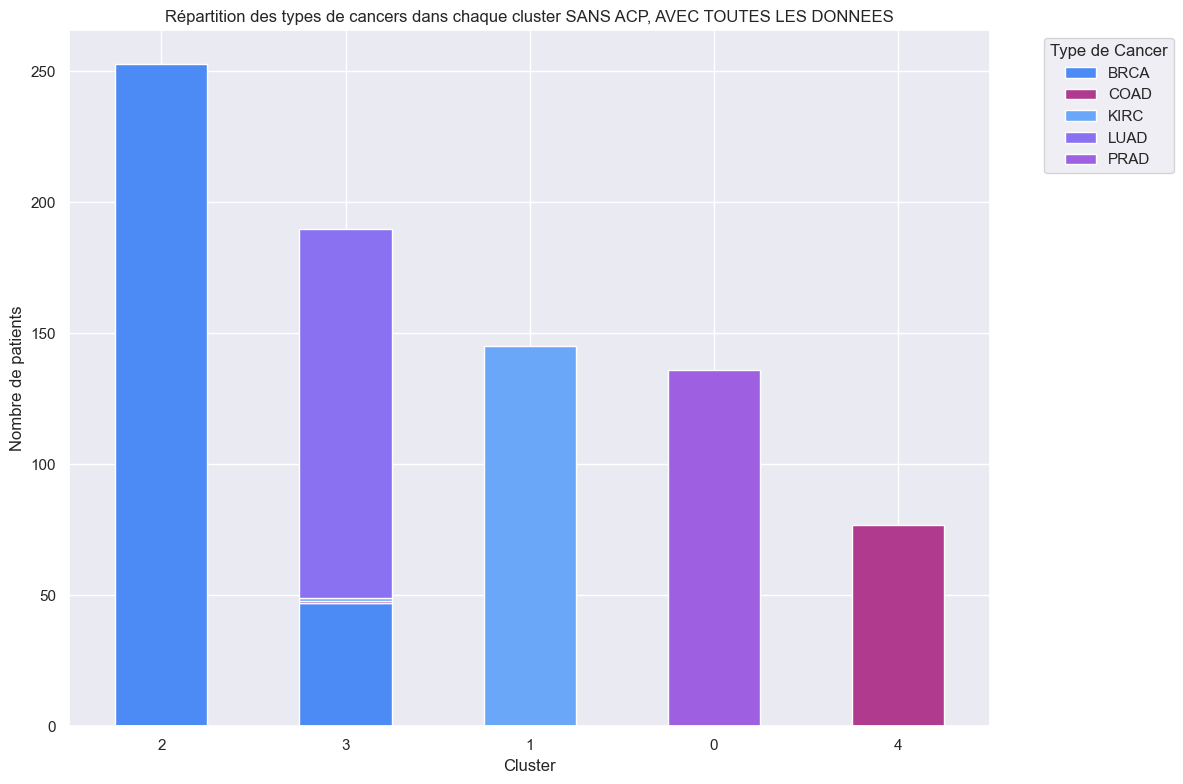

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copier les données normalisées
data_scaled_copy = df_scaled.copy()

# Importation des données labels
labels = pd.read_csv('data/labels.csv', sep=',')

# Appliquer K-Means
kmeans = KMeans(n_clusters=5, n_init=5, init='random', random_state=10, verbose=True)
kmeans.fit(data_scaled_copy)

# Récupérer les labels prédits par K-Means
predicted_labels = kmeans.labels_

# Comparer avec les vrais labels
true_labels = labels['Class'].astype('category').cat.codes.values  # Convertir les types de cancer en codes numériques

# Calcul des métriques d'évaluation
ari = adjusted_rand_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

# Ajouter les clusters au DataFrame des labels
labels['Clusters'] = predicted_labels

# Compter le nombre de patients de chaque type de cancer dans chaque cluster
cluster_counts = labels.groupby(['Clusters', 'Class']).size().unstack(fill_value=0)

# Trier les clusters en fonction de la fréquence totale des patients dans chaque cluster
cluster_counts = cluster_counts.loc[cluster_counts.sum(axis=1).sort_values(ascending=False).index]

# Visualiser les résultats avec un barplot en utilisant les couleurs personnalisées
colors = ['#4C8BF5', '#B03B8E', '#6BA7F8', '#8A71F2', '#9E60E0']

cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Répartition des types de cancers dans chaque cluster SANS ACP, AVEC TOUTES LES DONNEES')
plt.xlabel('Cluster')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)
plt.legend(title='Type de Cancer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## On refait l'ACP et on garde 100 variables (cf travail effectué sur la CAH)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Réalisation de l'ACP en gardant uniquement les 100 premières composantes
pca = PCA(n_components=100)
components = pca.fit_transform(df_scaled)

# Application du K-Means sur les 100 premières composantes principales
kmeans = KMeans(n_clusters=5, n_init=5, init='random', random_state=10, verbose=True)
kmeans.fit(components)

predicted_labels = kmeans.labels_

Initialization complete
Iteration 0, inertia 2598562.409623135.
Iteration 1, inertia 1340667.8178249444.
Iteration 2, inertia 1318684.2737404907.
Iteration 3, inertia 1318378.6831595527.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2746835.996561143.
Iteration 1, inertia 1342463.8664612307.
Iteration 2, inertia 1227053.528017629.
Iteration 3, inertia 1225357.1415021394.
Iteration 4, inertia 1224999.6938835206.
Iteration 5, inertia 1224931.0922672958.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3199010.9996820106.
Iteration 1, inertia 1355051.7133399132.
Iteration 2, inertia 1268069.4756119924.
Iteration 3, inertia 1265862.204441884.
Iteration 4, inertia 1255215.8492297549.
Iteration 5, inertia 1192075.6112660805.
Iteration 6, inertia 1063691.4645122783.
Iteration 7, inertia 1055193.1831228663.
Iteration 8, inertia 1055123.5082161857.
Iteration 9, inertia 1055103.3978862357.
Converged at iterati

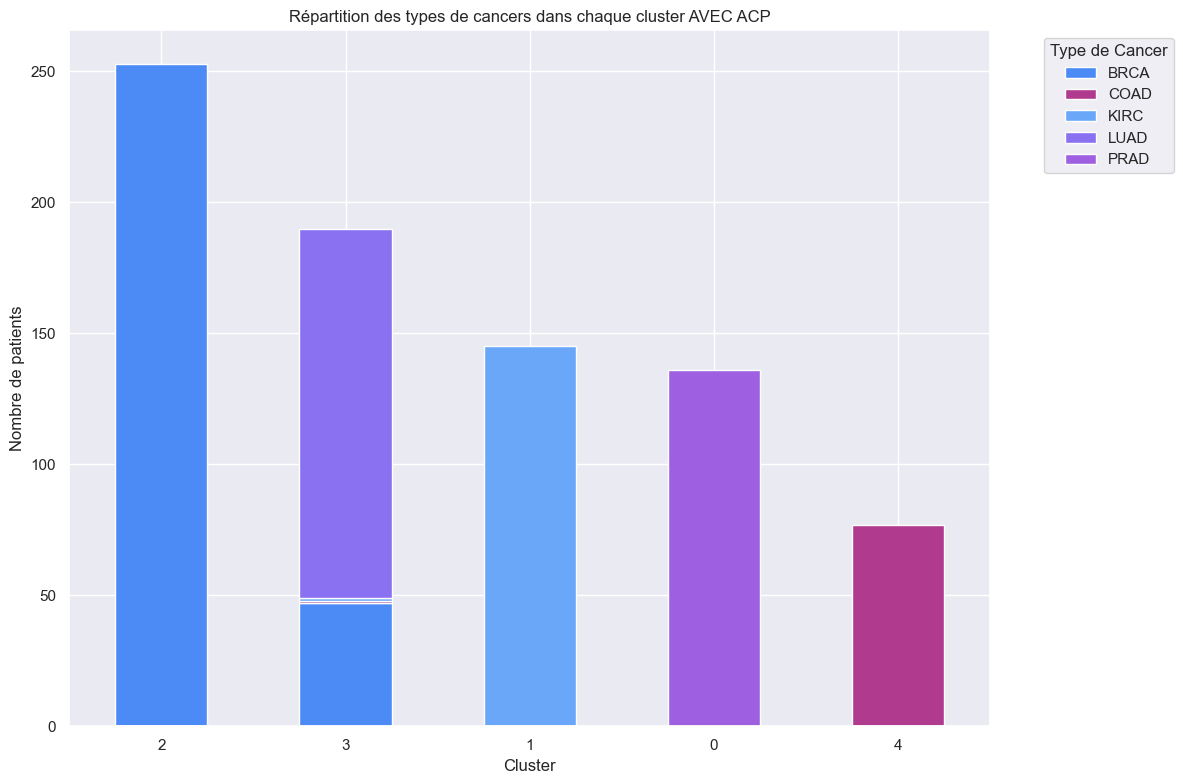

Adjusted Rand Index: 0.8336
Homogeneity Score: 0.9024


In [32]:
# Réalisation de l'ACP en gardant uniquement les 100 premières composantes
pca = PCA(n_components=100)
components = pca.fit_transform(df_scaled)

# Appliquer K-Means sur les 100 premières composantes principales
kmeans = KMeans(n_clusters=5, n_init=5, init='random', random_state=10, verbose=True)
kmeans.fit(components)

# Récupérer les labels prédits par K-Means
predicted_labels = kmeans.labels_

# Charger les labels
labels = pd.read_csv('data/labels.csv')

# Comparer avec les vrais labels
true_labels = labels['Class'].astype('category').cat.codes.values  # Convertir les types de cancer en codes numériques

# Calcul des métriques d'évaluation
ari = adjusted_rand_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

# Ajouter les clusters au DataFrame des labels
labels['Clusters'] = predicted_labels

# Compter le nombre de patients de chaque type de cancer dans chaque cluster
cluster_counts = labels.groupby(['Clusters', 'Class']).size().unstack(fill_value=0)

# Trier les clusters en fonction de la fréquence totale des patients dans chaque cluster
cluster_counts = cluster_counts.loc[cluster_counts.sum(axis=1).sort_values(ascending=False).index]

# Visualiser les résultats avec un barplot en utilisant les couleurs personnalisées (pour la DA)
colors = ['#4C8BF5', '#B03B8E', '#6BA7F8', '#8A71F2', '#9E60E0']

cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

plt.title('Répartition des types de cancers dans chaque cluster AVEC ACP')
plt.xlabel('Cluster')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)
plt.legend(title='Type de Cancer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Calcul des métriques d'évaluation
ari = adjusted_rand_score(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
